# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS2

In [5]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [6]:
s = Spectrum("ObsID0945020137_SRCNUM21_EMOS2_source_spectrum.fits")
s.background = "ObsID0945020137_SRCNUM21_EMOS2_background_spectrum.fits"
s.response = "ObsID0945020137_SRCNUM21_EMOS2.rmf"
s.response.arf = "ObsID0945020137_SRCNUM21_EMOS2.arf"


2 spectra  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS2_source_spectrum.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  4.721e-03 +/- 5.091e-04
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-2400
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.822e+04 sec
 Using fit statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Net count rate (cts/s) for Spectrum:2  2.535e-03 +/- 5.373e-04 (53.7 % total)
***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Response successfully loaded.
Arf successfully loaded.


## Plot spectrum

In [7]:
energies = s.energies
counts = s.values

Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

In [8]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

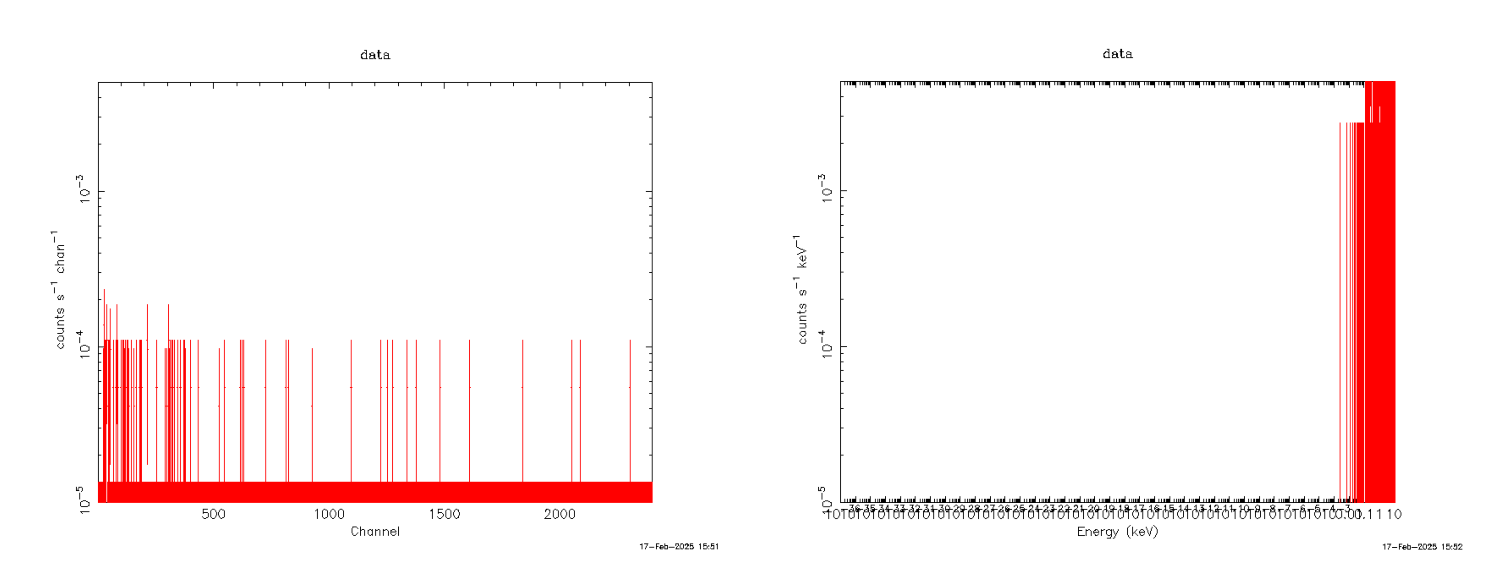

In [9]:
img_path1 = "ObsID0945020137_SRCNUM21_EMOS2_Spectrum.png"
img_path2 = "ObsID0945020137_SRCNUM21_EMOS2_Spectrum_energy.png"

images = [img_path1, img_path2]

fig, axes = plt.subplots(1, len(images), figsize=(15, 8))

for ax, img_path in zip(axes, images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Black body model

In [10]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.409636e+12     using 2400 bins, s

(-0.5, 859.5, 661.5, -0.5)

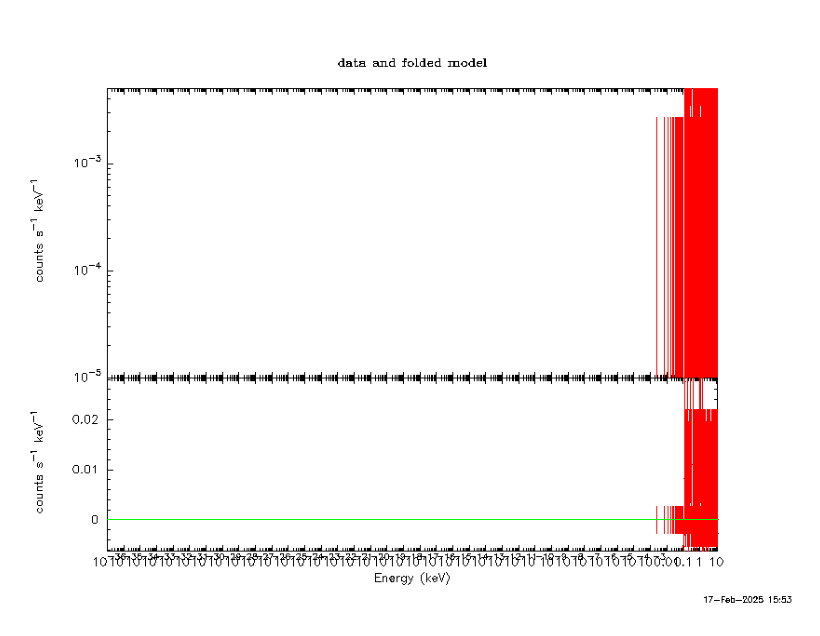

In [11]:
img_path = "ObsID0945020137_SRCNUM21_EMOS2_Spectrum_energy_bbody.png"
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')

### bremsstrahlung model

In [12]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.022070e+11     using 2400 bins, spectrum 1.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1
                 Chi-Squared              1.022070e+11     using 2400 bins, spectrum 2.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 2
Total fit statistic                       2.044140e+11     with 4797 d.o.f.

Test statistic : Chi-Squared              2.044140e+11     using 4800 bins.

***Warning: Chi-square may not be valid due to

### Apec model

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              3.333003e+10     using 2400 bins, spectrum 1.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1
                 Chi-Squared              3.333003e+10     using 2400 bins, spectrum 2.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 2
Total fit statistic                       6.66

### Powerlaw model

In [14]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.816196e+11     using 2400 bins, spectrum 1.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1
                 Chi-Squared              4.816196e+11     using 2400 bins, spectrum 2.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 2
Total fit statistic                       9.632391e+11     with 4797 d.o.f.

Test statistic : Chi-Squared              9.632391e+11     using 4800 bins.

***Warning: Chi-square may not be valid due 

## Flux

In [16]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux         0 photons (0 ergs/cm^2/s) range (0.20000 - 12.000 keV)
